| 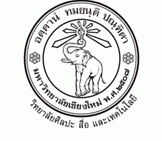 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          |        <em><font size=5>Department of Modern Management and <br> Information Technology </font></em><br>  <font size=3>College of Arts, Media and Technology,<br> Chiang Mai University<br></font> Midterm Examination, Academic Year 2021 <br> Business Data Mining 954471
|:- |-: 
|<strong>October 18th, 2021 8:00 - 23:59 </strong>| <strong>(Total 35 Points) </strong>

<b>Name__________Tanut____Jaidee______________________      Student ID___________622110154__________________</b>

Instructions: 

-	This exam is worth 35% of your final grade.
-	This exam consists of 5 Questions
-	Finish this exam, download it as .ipynb file and send it to my FB messenger.
-	Write your student ID as filename. 
-	Allow anything.
-	<b>Please do this exam alone and be honest to yourself. </b>
-	The time allowed students to leave the testing room after the exam is open to copy it.
-	Students who cheat in any way will be prosecuted by the CMU regulation BE 2554, which governs student behavior and describes discipline during the exam period. The proctor must report any suspected cheating to the director.
<br>

### <em>Score Sheet:</em>
|<font size=3> Question|<font size=3> Full Mark|<font size=3> Student’s Mark|
|:- |:-:|:-:
<font size=3> Q1 |<font size=3> 5|
<font size=3> Q2 |<font size=3> 5|
<font size=3> Q3 |<font size=3> 5|
<font size=3> Q4 |<font size=3> 10|
<font size=3> Q5 |<font size=3> 10|
<font size=3> Total|<font size=3> 35|








In [1]:
import numpy as np
import pandas as pd

#### Q1. Create Model to predict the Telco customer churn (Churn = Label).
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [2]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df_fac = df

In [6]:
df_fac['customerID'] = pd.factorize(df_fac['customerID'])[0]
df_fac['gender'] = pd.factorize(df_fac['gender'])[0]
df_fac['Partner'] = pd.factorize(df_fac['Partner'])[0]
df_fac['Dependents'] = pd.factorize(df_fac['Dependents'])[0]
df_fac['PhoneService'] = pd.factorize(df_fac['PhoneService'])[0]
df_fac['MultipleLines'] = pd.factorize(df_fac['MultipleLines'])[0]
df_fac['InternetService'] = pd.factorize(df_fac['InternetService'])[0]
df_fac['OnlineSecurity'] = pd.factorize(df_fac['OnlineSecurity'])[0]
df_fac['OnlineBackup'] = pd.factorize(df_fac['OnlineBackup'])[0]
df_fac['DeviceProtection'] = pd.factorize(df_fac['DeviceProtection'])[0]
df_fac['TechSupport'] = pd.factorize(df_fac['TechSupport'])[0]
df_fac['StreamingTV'] = pd.factorize(df_fac['StreamingTV'])[0]
df_fac['StreamingMovies'] = pd.factorize(df_fac['StreamingMovies'])[0]
df_fac['Contract'] = pd.factorize(df_fac['Contract'])[0]
df_fac['PaperlessBilling'] = pd.factorize(df_fac['PaperlessBilling'])[0]
df_fac['PaymentMethod'] = pd.factorize(df_fac['PaymentMethod'])[0]
df_fac['TotalCharges'] = pd.factorize(df_fac['TotalCharges'])[0]
df_fac['Churn'] = pd.factorize(df_fac['Churn'])[0]

In [7]:
df_fac.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [8]:
df_fac.groupby('Churn')['Churn'].count()

Churn
0    5174
1    1869
Name: Churn, dtype: int64

In [9]:
y = df['Churn'] # label
X = df.drop(['Churn'],axis = 1)#features

In [10]:
y.sum()

1869

In [11]:
len(y)-y.sum()

5174

In [12]:
X.shape

(7043, 20)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train.shape

(5634, 20)

In [15]:
X_test.shape

(1409, 20)

In [16]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=0)
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [17]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler (sampling_strategy='majority') 
X_res, y_res = undersample.fit_resample(X_train, y_train)

In [18]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))), 
  ('classification', ExtraTreesClassifier(random_state=0))
])

In [19]:
params = {
    'classification__n_estimators' : [10,20,50,100,200],
}
best_clf = GridSearchCV(clf, params ,cv=10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classification',
                                        ExtraTreesClassifier(random_state=0))]),
             param_grid={'classification__n_estimators': [10, 20, 50, 100,
                                                          200]})

In [20]:
print("Training Accuracy : "+str(best_clf.best_score_))

Training Accuracy : 0.7843439401383168


In [21]:
y_predict = best_clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.7714691270404542


#### Q2. Create Model to predict the spam mail utilizing feature selection method. (Column 0 = Label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [22]:
df = pd.read_csv("../input/plenoi-mail/MAIL.csv", header = None)
df_test = pd.read_csv("../input/plenoi-mail/MAIL_test.csv", header = None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.0,-1.000000,-0.792705,-1.000000,-1.000000,-1.000000,-0.421965,-1.00000,-1.000000,...,-1.0,-1.0,-0.088486,-1.000000,-0.903030,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1,0,-1.0,-0.941068,-0.735823,-0.791284,-0.833604,-0.882136,-1.000000,-0.73849,-0.865562,...,-1.0,-1.0,-0.859439,-0.970093,-0.970093,-0.574766,-0.715888,-0.891589,-0.837383,-1.0
2,0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.703353,-1.000000,-0.936884,-0.461539,-0.850098,-0.771204,-1.000000,-1.0
3,0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.729497,-0.884892,-0.769784,-1.000000,-0.453238,-0.582735,-1.000000,-1.0
4,0,-1.0,-1.000000,-0.728317,-1.000000,-0.315508,-0.515152,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.090325,-1.000000,-0.741936,-1.000000,0.225804,-1.000000,-1.000000,-1.0


In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.0,-1.00,-1.000000,-1.0,-1.00000,-1.000000,-1.0,-1.0,-1.000000,...,-1.0,-1.0,-0.148221,-1.000000,-1.000000,-1.000000,-0.754045,-1.000000,-0.718446,-1.0
1,0,-1.0,-1.00,-1.000000,-1.0,-0.82691,-0.632182,-1.0,-1.0,-0.720307,...,-1.0,-1.0,-0.554151,-1.000000,-0.936759,-0.640316,-1.000000,-0.312254,-1.000000,-1.0
2,0,-1.0,-0.84,-0.820690,-1.0,-1.00000,-1.000000,-1.0,-1.0,-0.635001,...,-1.0,-1.0,-0.608332,-0.916667,-1.000000,-0.763021,-1.000000,-1.000000,-1.000000,-1.0
3,0,-1.0,-1.00,-0.886152,-1.0,-1.00000,-0.796825,-1.0,-1.0,-1.000000,...,-1.0,-1.0,-0.387624,-1.000000,-0.895765,-0.703583,-1.000000,-0.811075,-0.716612,-1.0
4,0,-1.0,-1.00,-0.774452,-1.0,-1.00000,-0.798742,-1.0,-1.0,-1.000000,...,-1.0,-1.0,-1.000000,-0.894040,-0.894040,-1.000000,-0.496689,-1.000000,-1.000000,-1.0


In [24]:
df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.148221,-1.000000,-1.000000,-1.000000,-0.754045,-1.000000,-0.718446,-1.0
1,0,-1.000000,-1.000000,-1.000000,-1.0,-0.826910,-0.632182,-1.000000,-1.000000,-0.720307,...,-1.0,-1.0,-0.554151,-1.000000,-0.936759,-0.640316,-1.000000,-0.312254,-1.000000,-1.0
2,0,-1.000000,-0.840000,-0.820690,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.635001,...,-1.0,-1.0,-0.608332,-0.916667,-1.000000,-0.763021,-1.000000,-1.000000,-1.000000,-1.0
3,0,-1.000000,-1.000000,-0.886152,-1.0,-1.000000,-0.796825,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.387624,-1.000000,-0.895765,-0.703583,-1.000000,-0.811075,-0.716612,-1.0
4,0,-1.000000,-1.000000,-0.774452,-1.0,-1.000000,-0.798742,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-0.894040,-0.894040,-1.000000,-0.496689,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,1,-1.000000,-1.000000,-0.825912,-1.0,-0.780697,-1.000000,-0.514563,-0.310679,-1.000000,...,-1.0,-1.0,-0.810101,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
3583,1,-0.718147,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.400795,-1.000000,-0.872510,-0.818725,-1.000000,-1.000000,-0.306773,-1.0
3584,1,-1.000000,-0.854546,-1.000000,-1.0,0.026740,-0.854546,-1.000000,-1.000000,-0.668183,...,-1.0,-1.0,-0.645283,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.589623,-1.0
3585,1,-1.000000,-0.706422,-1.000000,-1.0,-1.000000,-0.706422,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-1.000000,-0.841584,-0.549505,-0.247525,-1.000000,-1.000000,-1.0


In [25]:
df.groupby(0)[0].count()

0
0    1204
1    2383
Name: 0, dtype: int64

In [26]:
df.isnull().any()

0      False
1      False
2      False
3      False
4      False
       ...  
396    False
397    False
398    False
399    False
400    False
Length: 401, dtype: bool

In [27]:
df.dtypes

0        int64
1      float64
2      float64
3      float64
4      float64
        ...   
396    float64
397    float64
398    float64
399    float64
400    float64
Length: 401, dtype: object

In [28]:
df_test.dtypes

0        int64
1      float64
2      float64
3      float64
4      float64
        ...   
396    float64
397    float64
398    float64
399    float64
400    float64
Length: 401, dtype: object

In [29]:
df_test.dtypes

0        int64
1      float64
2      float64
3      float64
4      float64
        ...   
396    float64
397    float64
398    float64
399    float64
400    float64
Length: 401, dtype: object

In [30]:
df_test.dtypes

0        int64
1      float64
2      float64
3      float64
4      float64
        ...   
396    float64
397    float64
398    float64
399    float64
400    float64
Length: 401, dtype: object

In [31]:
y = df[0].values 
X = df.drop([0],axis = 1).values

In [32]:
X.shape

(3587, 400)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [35]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1)) 
#scaler.fit(X_train) 
#X_train_norm = scaler.transform(X_train)
#X_test_norm = scaler.transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1)) ), 
  ('feature_selection', SelectKBest(f_classif)),
  ('classification', RandomForestClassifier(random_state=0))
])

In [37]:
params = {
    'feature_selection__k' : [3,5,7],
    'classification__n_estimators' : [10,20,50],
    'classification__max_depth' : [3,5,7]
}
best_clf = GridSearchCV(clf, params ,cv=10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'classification__max_depth': [3, 5, 7],
                         'classification__n_estimators': [10, 20, 50],
                         'feature_selection__k': [3, 5, 7]})

In [38]:
print("Training Accuracy : "+str(best_clf.best_score_))

Training Accuracy : 0.7309178626251798


In [39]:
y_predict = best_clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.7047353760445683


In [40]:
yb = df_test[0].values 
Xb = df_test.drop([0],axis = 1).values

In [41]:
#X_blind_norm = scaler.transform(Xb)

In [42]:
y_predict = best_clf.predict(Xb)
acc = sum(y_predict == yb)/len(yb)
print("Test accuracy : "+str(acc))

Test accuracy : 0.7242534189226905


In [43]:
#yp = best_clf.predict(Xb)
#yp = np.argmax(yp)
#sum(yp == yb)/len(yb)

#### Q3. Create Deep Learning Model to predict the quality of wine. Our model will focus only on wine with quality of 5, 6, 7 (quality = label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [44]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
df.groupby("quality")["quality"].count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [46]:
df.shape

(1599, 12)

In [47]:
df_drop = df[(df['quality']==5) | (df['quality']==6) | (df['quality']==7)]

In [48]:
df_drop.shape

(1518, 12)

In [49]:
df_drop.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [50]:
df_drop.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [51]:
df_drop.groupby('quality')['quality'].count()

quality
5    681
6    638
7    199
Name: quality, dtype: int64

In [52]:
Xo = df_drop.drop(['quality'],axis=1).values
yo = df_drop['quality'].values

In [53]:
np.unique(yo)

array([5, 6, 7])

In [54]:
yo[yo==5] = 0
yo[yo==6] = 1
yo[yo==7] = 2
np.unique(yo)

array([0, 1, 2])

In [55]:
[sum(yo == item) for item in np.unique(yo)]

[681, 638, 199]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y, yt = train_test_split(Xo, yo, test_size=0.2, random_state=0)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_val, y, yv = train_test_split(X_train, y, test_size=0.2, random_state=0)

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y)

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_res)
X_train_norm = scl.transform(X_res)
X_val_norm = scl.transform(X_val)
X_test_norm = scl.transform(X_test)
y = y_res

In [59]:
y

array([1, 2, 2, ..., 2, 2, 2])

In [60]:
num_label = len(np.unique(y)) 
y_multi = (np.arange(num_label) == y[:,None]).astype(np.float32)
yv_multi = (np.arange(num_label) == yv[:,None]).astype(np.float32)
yt_multi = (np.arange(num_label) == yt[:,None]).astype(np.float32)

In [61]:
yv_multi[0:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [62]:
sample_size, input_size = X_train_norm.shape

In [63]:
import tensorflow as tf
def create_model(input_size, num_label):
    tf.random.set_seed(154)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(32, activation='relu', input_shape=(input_size,)),
      #tf.keras.layers.Dense(2, activation='relu'),
      #tf.keras.layers.Dense(3, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(num_label, activation='softmax')    
    ])
    return model

2021-10-20 08:50:07.554606: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [64]:
model = create_model(input_size, num_label)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_acc = list()
val_acc = list()
for i in range(0,200):
  history = model.fit(X_train_norm, y_multi, epochs= 2, batch_size = sample_size, validation_data= (X_val_norm, yv_multi))
  tmp_avg = np.mean(history.history['loss'])
  tmp_avg_val = np.mean(history.history['val_loss'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

2021-10-20 08:50:11.275434: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-20 08:50:11.278800: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-20 08:50:11.317605: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 08:50:11.318295: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-20 08:50:11.318388: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-20 08:50:11.343824: I tensorflow/stream_executor/platform/def

Epoch 1/2


2021-10-20 08:50:13.842192: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


1/1 [==============================] - ETA: 0s - loss: 1.0997 - accuracy: 0.3484

2021-10-20 08:50:14.555785: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


1/1 [==============================] - 2s 2s/step - loss: 1.0997 - accuracy: 0.3484 - val_loss: 1.1760 - val_accuracy: 0.1317
Epoch 2/2
1/1 [==============================] - 0s 41ms/step - loss: 1.1012 - accuracy: 0.3365 - val_loss: 1.1707 - val_accuracy: 0.1317
Epoch 1/2
1/1 [==============================] - 0s 80ms/step - loss: 1.0958 - accuracy: 0.3341 - val_loss: 1.1657 - val_accuracy: 0.1399
Epoch 2/2
1/1 [==============================] - 0s 38ms/step - loss: 1.0955 - accuracy: 0.3365 - val_loss: 1.1607 - val_accuracy: 0.1399
Epoch 1/2
1/1 [==============================] - 0s 81ms/step - loss: 1.0959 - accuracy: 0.3294 - val_loss: 1.1558 - val_accuracy: 0.1440
Epoch 2/2
1/1 [==============================] - 0s 38ms/step - loss: 1.0925 - accuracy: 0.3357 - val_loss: 1.1510 - val_accuracy: 0.1440
Epoch 1/2
1/1 [==============================] - 0s 82ms/step - loss: 1.0889 - accuracy: 0.3397 - val_loss: 1.1465 - val_accuracy: 0.1440
Epoch 2/2
1/1 [==============================]

In [65]:
# train
yp = model.predict(X_val_norm)
yp = np.argmax(yp, 1)
sum(yp == yv)/len(yv)

0.6337448559670782

In [66]:
# test
yp = model.predict(X_test_norm)
yp = np.argmax(yp, 1)
sum(yp == yt)/len(yt)

0.5789473684210527

#### Q4. From this food images ("../input/food41/images"), please create an image classifier to classify 2 types of food choosing by yourself. (Show me the accuracy of each type of food) 
<b><font color=red>Both types of food must be more than 50% to get full score.</font></b>

In [67]:
#แยกไฟล์

#### Q5. Create an object detection model to detect your own face in the picture. (Show me that the model can detect your face in a test image.)
<b><font color=red>The model must be able to detect your face to get full score.</font></b>

In [68]:
#แยกไฟล์